Names: Lavan Aditya, Amrish Naranappa, Vaibhav Shintre, Austin Bressler

In [ ]:
# install the neccesary libraries
from google.colab import files
import io
import pandas as pd
import numpy as np

# install visualization tools
import seaborn as sns
import matplotlib.pyplot as plt

# upload the data file
uploaded = files.upload()

Saving student-por.csv to student-por.csv
Saving student-mat.csv to student-mat.csv


In [ ]:
# read in the database
StudentMath = pd.read_csv('student-mat.csv', delimiter=';')
StudentPort = pd.read_csv('student-por.csv', delimiter=';')

# checking if the files were read correctly
print(StudentMath)
print(StudentPort)

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel freetime  goout  Dalc  Walc health 

In [ ]:
# Dropping the 'G1' and 'G2' columns from the StudentMath DataFrame to keep only 'G3' and other relevant columns
mathG3Only = StudentMath.drop(['G1', 'G2'], axis=1)

# Dropping the 'G1' and 'G2' columns from the StudentPort DataFrame to keep only 'G3' and other relevant columns
portG3Only = StudentPort.drop(['G1', 'G2'], axis=1)

# Rename columns in the math dataset to clearly indicate these values come from the math file.
Sm_temp = mathG3Only.rename(columns={'G3': 'MG3', "paid": "paidM", "failures": "failuresM", "absences": "absencesM"}, inplace=False)
print(Sm_temp)
# Rename columns in the Portuguese dataset to indicate they belong to the Portugal file.
sp_temp = portG3Only.rename(columns={'G3': 'PG3', "paid": "paidP", "failures": "failuresP", "absences": "absencesP"}, inplace=False)
print(sp_temp)


    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... internet romantic  famrel  freetime  goout

In [ ]:
# performing an inner join between Sm_temp and sp_temp on their common columns
sm_inter = pd.merge(Sm_temp, sp_temp, 'inner')

# printing the result to verify that there is a correct amount of matching files.
print(sm_inter.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      370 non-null    object
 1   sex         370 non-null    object
 2   age         370 non-null    int64 
 3   address     370 non-null    object
 4   famsize     370 non-null    object
 5   Pstatus     370 non-null    object
 6   Medu        370 non-null    int64 
 7   Fedu        370 non-null    int64 
 8   Mjob        370 non-null    object
 9   Fjob        370 non-null    object
 10  reason      370 non-null    object
 11  guardian    370 non-null    object
 12  traveltime  370 non-null    int64 
 13  studytime   370 non-null    int64 
 14  failuresM   370 non-null    int64 
 15  schoolsup   370 non-null    object
 16  famsup      370 non-null    object
 17  paidM       370 non-null    object
 18  activities  370 non-null    object
 19  nursery     370 non-null    object
 20  higher    

We will be working with these variables to see how they improve final grade.

schoolsup - extra educational support, yes or no

famsup - family educational support, yes or no

paid - extra paid classes within the course subject, yes or no

In [ ]:
# Make paidM into a category
sm_inter["paidMCat"] = sm_inter["paidM"].astype("category")

# Make paidP into a category
sm_inter["paidPCat"] = sm_inter["paidP"].astype("category")

# Make farmsup into a category
sm_inter["famsupCat"] = sm_inter["famsup"].astype("category")

# Make farmsup into a category
sm_inter["schoolsupCat"] = sm_inter["schoolsup"].astype("category")

# check to see if all categories were created correctly
sm_inter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 39 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   school        370 non-null    object  
 1   sex           370 non-null    object  
 2   age           370 non-null    int64   
 3   address       370 non-null    object  
 4   famsize       370 non-null    object  
 5   Pstatus       370 non-null    object  
 6   Medu          370 non-null    int64   
 7   Fedu          370 non-null    int64   
 8   Mjob          370 non-null    object  
 9   Fjob          370 non-null    object  
 10  reason        370 non-null    object  
 11  guardian      370 non-null    object  
 12  traveltime    370 non-null    int64   
 13  studytime     370 non-null    int64   
 14  failuresM     370 non-null    int64   
 15  schoolsup     370 non-null    object  
 16  famsup        370 non-null    object  
 17  paidM         370 non-null    object  
 18  activities

Let's explore how forms of extra help such as help from family, school, or paid tutoring change the expected grade. We want to see how much these factors improve the final grade if at all, and if they seem to be good predictors of final grade once a model uses them. First however we will look at the average grade with no sorting.

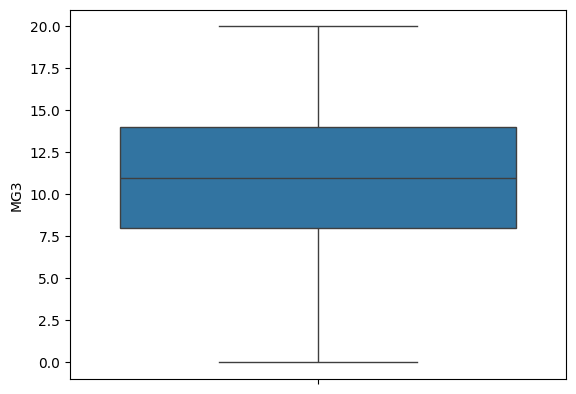

Math Grades:
Math mean:10.464864864864865
Math std:4.608829526277274
Math Medial:11.0
Math 1/4 Quartile: 8.0, 3/4 Quartile:14.0 



In [ ]:
# let's compare final Mathematic grades for both classes
sns.boxplot(y="MG3", data=sm_inter)
plt.show()

# Get the Mean, Standard Deviation, Median, and quartiles for math grade
print("Math Grades:")
print(f"Math mean:{sm_inter.MG3.mean()}")
print(f"Math std:{sm_inter.MG3.std()}")
print(f"Math Medial:{sm_inter.MG3.median()}")
print(f"Math 1/4 Quartile: {sm_inter.MG3.quantile(q=0.25)}, 3/4 Quartile:{sm_inter.MG3.quantile(q=0.75)} \n")

Average mean for math is about 10.5, we would want to see a signficant increase from 10.5 for any group here to show that they are effective grade boosters.

We will now conduct the same analysis for portuguese

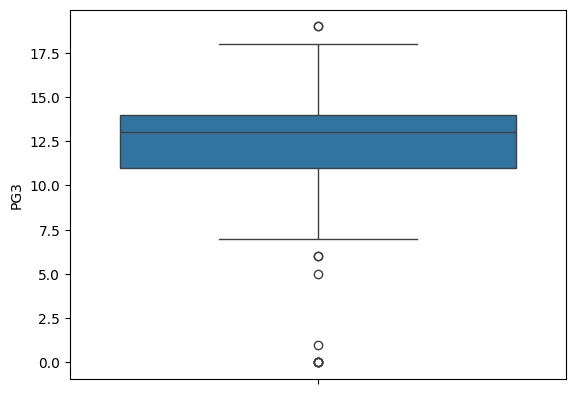

Port Grades:
Port mean:12.554054054054054
Port std:2.943652819404742
Port Medial:13.0
Port 1/4 Quartile: 11.0, 3/4 Quartile:14.0 



In [ ]:
# let's compare final Portuguese grades for both classes
sns.boxplot(y="PG3", data=sm_inter)
plt.show()

# Get the Mean, Standard Deviation, Median, and quartiles for Portuguese grade
print("Port Grades:")
print(f"Port mean:{sm_inter.PG3.mean()}")
print(f"Port std:{sm_inter.PG3.std()}")
print(f"Port Medial:{sm_inter.PG3.median()}")
print(f"Port 1/4 Quartile: {sm_inter.PG3.quantile(q=0.25)}, 3/4 Quartile:{sm_inter.PG3.quantile(q=0.75)} \n")

Average mean for Protuguese is about 12.5, we would want to see a signficant increase from 12.5 for any group here to show that they are effective grade boosters.

We should now look first at each different group and see how the average grade looks
when we group by having specific form of extra help.

<ipython-input-7-9755b0652efb>:2: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  sns.boxplot(x="famsupCat", y="MG3", hue="famsupCat", data=sm_inter, palette=sns.color_palette("Set1"))


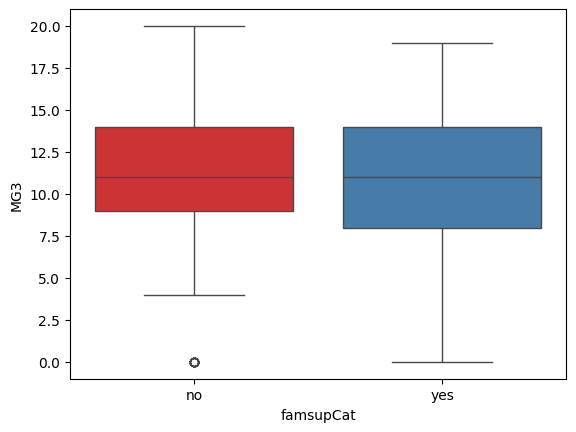

No Family Help:
Math mean:10.762589928057555
Math std:4.658765672524433
Math Medial:11.0
Math 1/4 Quartile: 9.0, 3/4 Quartile:14.0 

Yes Family Help:
Math mean:10.285714285714286
Math std:4.579321602093886
Math Medial:11.0
Math 1/4 Quartile: 8.0, 3/4 Quartile:14.0


In [ ]:
# let's compare final Mathematic grades for both classes by famsup
sns.boxplot(x="famsupCat", y="MG3", hue="famsupCat", data=sm_inter, palette=sns.color_palette("Set1"))
plt.show()

# Let's see the exact value of various important values like mean are effected
# by no help
NoFHelp = sm_inter.query("famsupCat == 'no'")
# Get the Mean, Standard Deviation, Median, and quartiles for math grade
print("No Family Help:")
print(f"Math mean:{NoFHelp.MG3.mean()}")
print(f"Math std:{NoFHelp.MG3.std()}")
print(f"Math Medial:{NoFHelp.MG3.median()}")
print(f"Math 1/4 Quartile: {NoFHelp.MG3.quantile(q=0.25)}, 3/4 Quartile:{NoFHelp.MG3.quantile(q=0.75)} \n")

# Let's see the exact value of various important values like mean are effected
# by help
YesFHelp = sm_inter.query("famsupCat == 'yes'")
# Get the Mean, Standard Deviation, Median, and quartiles for math grade
print("Yes Family Help:")
print(f"Math mean:{YesFHelp.MG3.mean()}")
print(f"Math std:{YesFHelp.MG3.std()}")
print(f"Math Medial:{YesFHelp.MG3.median()}")
print(f"Math 1/4 Quartile: {YesFHelp.MG3.quantile(q=0.25)}, 3/4 Quartile:{YesFHelp.MG3.quantile(q=0.75)}")

<ipython-input-8-bbaa8dbc8350>:2: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  sns.boxplot(x="famsupCat", y="PG3", hue="famsupCat", data=sm_inter, palette=sns.color_palette("Set1"))


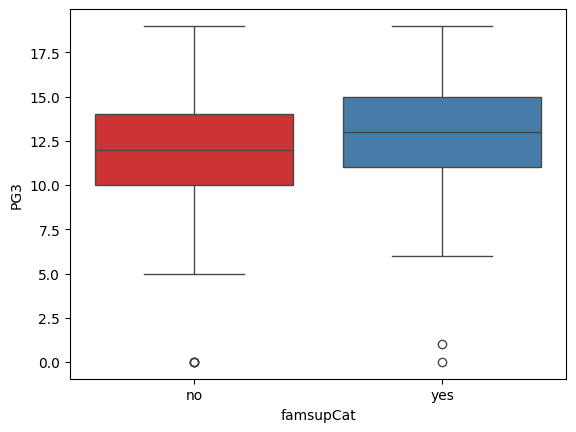

No Family Help:
Port mean:12.194244604316546
Port std:3.3640850293449343
Port Medial:12.0
Port 1/4 Quartile: 10.0, 3/4 Quartile:14.0 

Yes Family Help:
Port mean:12.770562770562771
Port std:2.643153441761355
Port Medial:13.0
Port 1/4 Quartile: 11.0, 3/4 Quartile:15.0


In [ ]:
# let's compare Portuguese final grades for both classes by famsup
sns.boxplot(x="famsupCat", y="PG3", hue="famsupCat", data=sm_inter, palette=sns.color_palette("Set1"))
plt.show()

# Let's see the exact value of various important values like mean are effected
# by no help
# Get the Mean, Standard Deviation, Median, and quartiles for math grade
print("No Family Help:")
print(f"Port mean:{NoFHelp.PG3.mean()}")
print(f"Port std:{NoFHelp.PG3.std()}")
print(f"Port Medial:{NoFHelp.PG3.median()}")
print(f"Port 1/4 Quartile: {NoFHelp.PG3.quantile(q=0.25)}, 3/4 Quartile:{NoFHelp.PG3.quantile(q=0.75)} \n")

# Let's see the exact value of various important values like mean are effected
# by help
# Get the Mean, Standard Deviation, Median, and quartiles for math grade
print("Yes Family Help:")
print(f"Port mean:{YesFHelp.PG3.mean()}")
print(f"Port std:{YesFHelp.PG3.std()}")
print(f"Port Medial:{YesFHelp.PG3.median()}")
print(f"Port 1/4 Quartile: {YesFHelp.PG3.quantile(q=0.25)}, 3/4 Quartile:{YesFHelp.PG3.quantile(q=0.75)}")

Family help actually lowered the average math grade by a small amount, but also increased the average portuguese grade by a small amount, family help doesn't seem to make a difference. Not getting help from family also seemed to reduce the standard deviation greatly.

<ipython-input-9-d63b45b493fc>:2: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  sns.boxplot(x="schoolsupCat", y="MG3", hue="schoolsupCat", data=sm_inter, palette=sns.color_palette("Set1"))


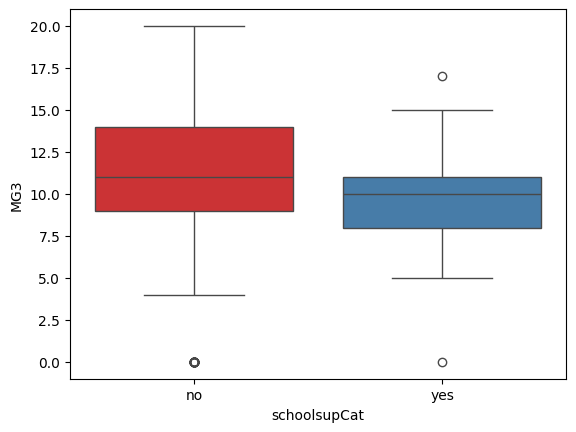

No School Help:
Math mean:10.616822429906541
Math std:4.8016498332859845
Math Medial:11.0
Math 1/4 Quartile: 9.0, 3/4 Quartile:14.0 

Yes School Help:
Math mean:9.46938775510204
Math std:2.9018818665388393
Math Medial:10.0
Math 1/4 Quartile: 8.0, 3/4 Quartile:11.0


In [ ]:
# let's compare final Mathematic grades for both classes by schoolsup
sns.boxplot(x="schoolsupCat", y="MG3", hue="schoolsupCat", data=sm_inter, palette=sns.color_palette("Set1"))
plt.show()

# Let's see the exact value of various important values like mean are effected
# by no school help
NoSHelp = sm_inter.query("schoolsupCat == 'no'")
# Get the Mean, Standard Deviation, Median, and quartiles for math grade
print("No School Help:")
print(f"Math mean:{NoSHelp.MG3.mean()}")
print(f"Math std:{NoSHelp.MG3.std()}")
print(f"Math Medial:{NoSHelp.MG3.median()}")
print(f"Math 1/4 Quartile: {NoSHelp.MG3.quantile(q=0.25)}, 3/4 Quartile:{NoSHelp.MG3.quantile(q=0.75)} \n")

# Let's see the exact value of various important values like mean are effected
# by help
YesSHelp = sm_inter.query("schoolsupCat == 'yes'")
# Get the Mean, Standard Deviation, Median, and quartiles for math grade
print("Yes School Help:")
print(f"Math mean:{YesSHelp.MG3.mean()}")
print(f"Math std:{YesSHelp.MG3.std()}")
print(f"Math Medial:{YesSHelp.MG3.median()}")
print(f"Math 1/4 Quartile: {YesSHelp.MG3.quantile(q=0.25)}, 3/4 Quartile:{YesSHelp.MG3.quantile(q=0.75)}")

<ipython-input-10-c5008eed5d01>:2: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  sns.boxplot(x="schoolsupCat", y="PG3", hue="schoolsupCat", data=sm_inter, palette=sns.color_palette("Set1"))


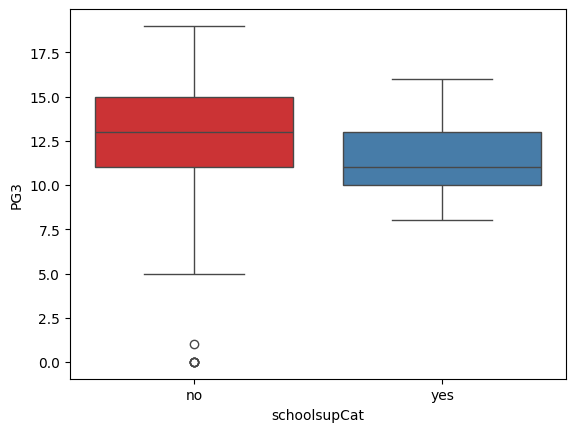

No School Help:
Port mean:12.71651090342679
Port std:3.0655354814717115
Port Medial:13.0
Port 1/4 Quartile: 11.0, 3/4 Quartile:15.0 

Yes School Help:
Port mean:11.489795918367347
Port std:1.621758934248961
Port Medial:11.0
Port 1/4 Quartile: 10.0, 3/4 Quartile:13.0


In [ ]:
# let's compare Portuguese final grades for both classes by Schoolsup
sns.boxplot(x="schoolsupCat", y="PG3", hue="schoolsupCat", data=sm_inter, palette=sns.color_palette("Set1"))
plt.show()

# Let's see the exact value of various important values like mean are effected
# by no help
# Get the Mean, Standard Deviation, Median, and quartiles for math grade
print("No School Help:")
print(f"Port mean:{NoSHelp.PG3.mean()}")
print(f"Port std:{NoSHelp.PG3.std()}")
print(f"Port Medial:{NoSHelp.PG3.median()}")
print(f"Port 1/4 Quartile: {NoSHelp.PG3.quantile(q=0.25)}, 3/4 Quartile:{NoSHelp.PG3.quantile(q=0.75)} \n")

# Let's see the exact value of various important values like mean are effected
# by help
# Get the Mean, Standard Deviation, Median, and quartiles for math grade
print("Yes School Help:")
print(f"Port mean:{YesSHelp.PG3.mean()}")
print(f"Port std:{YesSHelp.PG3.std()}")
print(f"Port Medial:{YesSHelp.PG3.median()}")
print(f"Port 1/4 Quartile: {YesSHelp.PG3.quantile(q=0.25)}, 3/4 Quartile:{YesSHelp.PG3.quantile(q=0.75)}")

Surprisingly getting help from school directly doesn't seem to improve the average grade at all, in fact it lowered the average grade for both grades by a whole point implying that needing help from the school meant a student was expected to do worse on average. Getting help also greatly reduced the standard deviation implying the range of grades you could expect from a student getting help was much smaller.

<ipython-input-11-921c136dccb2>:4: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  sns.boxplot(x="paidMCat", y="MG3", hue="paidMCat", data=sm_inter, palette=sns.color_palette("Set1"))


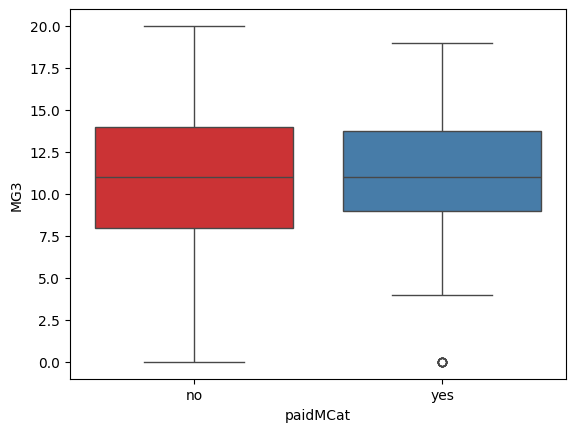

No Paid Math Tutoring:
Math mean:10.071428571428571
Math std:5.174394551477399
Math Medial:11.0
Math 1/4 Quartile: 8.0, 3/4 Quartile:14.0 

Yes Paid Math Tutoring:
Math mean:10.908045977011493
Math std:3.841158856651955
Math Medial:11.0
Math 1/4 Quartile: 9.0, 3/4 Quartile:13.75


In [ ]:
# let's compare final Mathematic grades for both classes by PaidM
# We won't apply PaidM to their portuguese grade since math tutoring doesn't
# apply to portuguese
sns.boxplot(x="paidMCat", y="MG3", hue="paidMCat", data=sm_inter, palette=sns.color_palette("Set1"))
plt.show()

# Let's see the exact value of various important values like mean are effected
# by no paid math tutoring
NoPaidM = sm_inter.query("paidMCat == 'no'")
# Get the Mean, Standard Deviation, Median, and quartiles for math grade
print("No Paid Math Tutoring:")
print(f"Math mean:{NoPaidM.MG3.mean()}")
print(f"Math std:{NoPaidM.MG3.std()}")
print(f"Math Medial:{NoPaidM.MG3.median()}")
print(f"Math 1/4 Quartile: {NoPaidM.MG3.quantile(q=0.25)}, 3/4 Quartile:{NoPaidM.MG3.quantile(q=0.75)} \n")

# Let's see the exact value of various important values like mean are effected
# by Math Tutoring
YesPaidM = sm_inter.query("paidMCat == 'yes'")
# Get the Mean, Standard Deviation, Median, and quartiles for math grade
print("Yes Paid Math Tutoring:")
print(f"Math mean:{YesPaidM.MG3.mean()}")
print(f"Math std:{YesPaidM.MG3.std()}")
print(f"Math Medial:{YesPaidM.MG3.median()}")
print(f"Math 1/4 Quartile: {YesPaidM.MG3.quantile(q=0.25)}, 3/4 Quartile:{YesPaidM.MG3.quantile(q=0.75)}")

Tutoring for a Math Class has surprisingly little effect as it only raised the average grade by less than half a point. furthermore it brought the standard deviation down meaning that students ended up producing more consistent results when tutored.

<ipython-input-12-9fc3dbb49b2b>:4: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  sns.boxplot(x="paidPCat", y="PG3", hue="paidPCat", data=sm_inter, palette=sns.color_palette("Set1"))


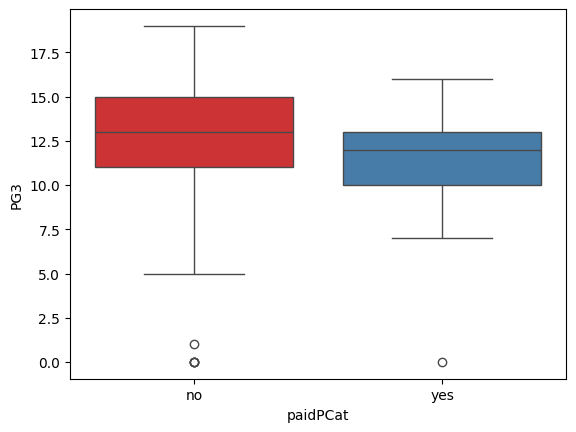

No Paid Port Tutoring:
Port mean:12.660869565217391
Port std:2.900141205027801
Port Medial:13.0
Port 1/4 Quartile: 11.0, 3/4 Quartile:15.0 

Yes Paid Port Tutoring:
Port mean:11.08
Port std:3.2005207909547058
Port Medial:12.0
Port 1/4 Quartile: 10.0, 3/4 Quartile:13.0


In [ ]:
# let's compare final Portuguese grades for both classes by PaidP
# We won't apply PaidP to their math grade since Portuguese tutoring doesn't
# apply to math
sns.boxplot(x="paidPCat", y="PG3", hue="paidPCat", data=sm_inter, palette=sns.color_palette("Set1"))
plt.show()

# Let's see the exact value of various important values like mean are effected
# by no paid Port tutoring
NoPaidP = sm_inter.query("paidPCat == 'no'")
# Get the Mean, Standard Deviation, Median, and quartiles for math grade
print("No Paid Port Tutoring:")
print(f"Port mean:{NoPaidP.PG3.mean()}")
print(f"Port std:{NoPaidP.PG3.std()}")
print(f"Port Medial:{NoPaidP.PG3.median()}")
print(f"Port 1/4 Quartile: {NoPaidP.PG3.quantile(q=0.25)}, 3/4 Quartile:{NoPaidP.PG3.quantile(q=0.75)} \n")

# Let's see the exact value of various important values like mean are effected
# by Port Tutoring
YesPaidP = sm_inter.query("paidPCat == 'yes'")
# Get the Mean, Standard Deviation, Median, and quartiles for math grade
print("Yes Paid Port Tutoring:")
print(f"Port mean:{YesPaidP.PG3.mean()}")
print(f"Port std:{YesPaidP.PG3.std()}")
print(f"Port Medial:{YesPaidP.PG3.median()}")
print(f"Port 1/4 Quartile: {YesPaidP.PG3.quantile(q=0.25)}, 3/4 Quartile:{YesPaidP.PG3.quantile(q=0.75)}")

Tutoring for a Portuguese Class also has a surprisingly negative effect, it brought the mean by down 1.5 points from the expected average implying that a student getting paid tutoring could on average be expected to do worse than a student not receiving tutoring. However it did also reduce the standard deviation making their final grade more predictable.

It is surprising that tutoring indicates a lower grade overall than no tutoring. Perhaps it only really helps students who are failing but does not help students excel if they are already doing fine thus bringing a low grade to a better but still not fantastic grade.

The conclusion seems to be that these methods of extra help don't help a student excel in class, and are not generally strong predictors of final grade on their own unlike what one may expect on the outset.

An example query with response rows

In [ ]:
# Let's see the exact value of various important values like mean are effected
# by yes school help
YesSHelpB = sm_inter.query("schoolsupCat == 'yes'")
print(YesSHelpB.head())
print(YesSHelpB.shape)
print(sm_inter.shape)
YesSHelpB.to_csv('schoolout.csv')

   school sex  age address famsize Pstatus  Medu  Fedu      Mjob     Fjob  \
0      GP   F   18       U     GT3       A     4     4   at_home  teacher   
2      GP   F   15       U     LE3       T     1     1   at_home    other   
7      GP   F   17       U     GT3       A     4     4     other  teacher   
17     GP   F   16       U     GT3       T     3     3     other    other   
24     GP   F   15       R     GT3       T     2     4  services   health   

    ... absencesM MG3  failuresP  paidP  absencesP PG3 paidMCat paidPCat  \
0   ...         6   6          0     no          4  11       no       no   
2   ...        10  10          0     no          6  12      yes       no   
7   ...         6   6          0     no          2  13       no       no   
17  ...         4  10          0     no          2  14       no       no   
24  ...         2   8          0     no          2  10      yes       no   

   famsupCat schoolsupCat  
0         no          yes  
2         no          ye